In [1]:
# Air resistance forces of an idealized thrown slab tumbling in 2D
# (Does not account for moments of inertia)

In [1]:
import sympy as sp
import sympy.physics.mechanics as me

m = sp.symbols("m")
g = sp.Symbol("g")
drag = sp.Symbol('drag')
lift = sp.Symbol('lift')
neutralattackangle = sp.Symbol('neutralattackangle')
turningforce = sp.Symbol('turningforce')

# Position of slab
x = me.dynamicsymbols('x')
z = me.dynamicsymbols('z')
ytheta = me.dynamicsymbols('ytheta')

# velocity of slab
xv = me.dynamicsymbols('xv')
zv = me.dynamicsymbols('zv')
ythetav = me.dynamicsymbols('ythetav')

xd = me.dynamicsymbols('x', 1)
zd = me.dynamicsymbols('z', 1)
ythetad = me.dynamicsymbols('ytheta', 1)
kinematic_equations = [xv-xd, zv-zd, ythetav-ythetad]

BaseFrame = me.ReferenceFrame('Base')
origin  = me.Point('origin')
origin.set_vel(BaseFrame, 0)

SlabFrame = BaseFrame.orientnew('Slab', 'Axis', [ytheta, BaseFrame.y])
SlabFrame.set_ang_vel(SlabFrame, ythetav * SlabFrame.y)

slabvel = xv*BaseFrame.x + zv*BaseFrame.z
slabpt = origin.locatenew('slab', x*BaseFrame.x + z*BaseFrame.z)
slabpt.set_vel(BaseFrame, slabvel)
Iyy = me.outer(SlabFrame.y, SlabFrame.y)
slabbody = me.RigidBody(name="slab", masscenter=slabpt, frame=SlabFrame, mass=m, 
                        inertia=(Iyy, slabpt))

# the force is perpendicular against the plane of the disc away from the direction of 
# motion with the cosine of the direction times the square of the magnitude
sfzdotslabvel = SlabFrame.z.dot(slabvel)
liftforce = lift*abs(sfzdotslabvel)*sfzdotslabvel*SlabFrame.z
dragforce = drag*slabvel*slabvel.magnitude()

# The turning moment is proportional to the 
turningmoment = turningforce*(SlabFrame.z.dot(slabvel) - sp.sin(neutralattackangle))

forces = [ (slabpt, -g*m*BaseFrame.z - liftforce - dragforce), 
           (SlabFrame, -SlabFrame.y*turningmoment) ]
bodies = [ slabbody ]

kane = me.KanesMethod(BaseFrame, 
                     q_ind=[x, z, ytheta], 
                     u_ind=[xv, zv, ythetav],
                     kd_eqs=kinematic_equations)
fr, frstar = kane.kanes_equations(bodies, forces)
fr

Matrix([
[      -drag*sqrt(xv(t)**2 + zv(t)**2)*xv(t) - lift*(xv(t)*sin(ytheta(t)) + zv(t)*cos(ytheta(t)))*sin(ytheta(t))*Abs(xv(t)*sin(ytheta(t)) + zv(t)*cos(ytheta(t)))],
[-drag*sqrt(xv(t)**2 + zv(t)**2)*zv(t) - g*m - lift*(xv(t)*sin(ytheta(t)) + zv(t)*cos(ytheta(t)))*cos(ytheta(t))*Abs(xv(t)*sin(ytheta(t)) + zv(t)*cos(ytheta(t)))],
[                                                                           -turningforce*(xv(t)*sin(ytheta(t)) + zv(t)*cos(ytheta(t)) - sin(neutralattackangle))]])

In [13]:
float(sp.rad(-15))

-0.26179938779914946

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


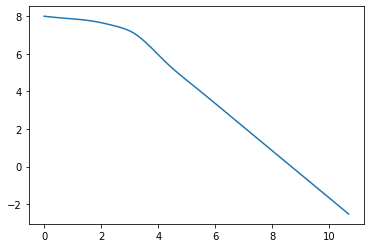

In [64]:
from pydy.system import System
import numpy as np

initial_conditions = {x:0, z:8, ytheta:float(sp.rad(0)), 
                      xv:10, zv:-2, ythetav:0}
sys = System(kane,
             constants={m: 1.0, g: 1, drag:1, lift:8, turningforce:12, neutralattackangle:float(sp.rad(-17)) },
             #specifieds={ bounceforce: bounceforcefunc },
             initial_conditions=initial_conditions,
             times=np.linspace(0.0, 20.0, 500))
y1 = sys.integrate()

plt.plot(y1[:,0], y1[:,1])
plt.show()


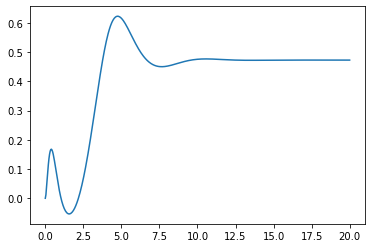

In [65]:
plt.plot(sys.times, y1[:,2])

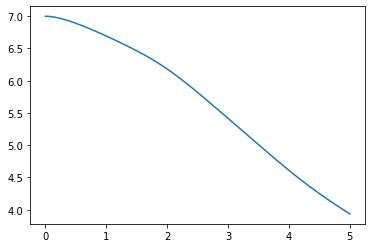

In [17]:
plt.plot(sys.times, y1[:,1])

In [66]:
import pydy.viz as pv
import IPython.display

ground_viz = pv.Plane(10, 10, color='blue')
slab_viz = pv.Cylinder(0.1, 1.0, color='red')
reference_frame, origin = BaseFrame, origin

SlabFrameRot = SlabFrame.orientnew('SlabRot', 'Axis', [sp.pi/2, SlabFrame.x])
        # required to orient the disc axis in z
    
v1 = pv.VisualizationFrame('plate', BaseFrame, origin, ground_viz)
v2 = pv.VisualizationFrame('slab', SlabFrameRot, slabpt, slab_viz)
scene = pv.Scene(reference_frame, origin, v1, v2, system=sys)

scene.display()
#scene.display_ipython()
#IPython.display.display(IPython.display.HTML(scene._html_widget.value))

/home/julian/repositories/Future-Hangglider/HGnotebooks/pydy_modelling/pydy-resources/pydy-resources/pydy-resources/pydy-resources
Serving HTTP on 127.0.0.1 port 8003 ...
To view visualization, open:

http://localhost:8003/index.html?load=2020-03-28_21-35-42_scene_desc.json
Press Ctrl+C to stop server...


127.0.0.1 - - [28/Mar/2020 21:35:43] "GET /index.html?load=2020-03-28_21-35-42_scene_desc.json HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2020 21:35:43] "GET /2020-03-28_21-35-42_scene_desc.json HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2020 21:35:43] code 404, message File not found
127.0.0.1 - - [28/Mar/2020 21:35:43] "GET /fonts/glyphicons-halflings-regular.woff2 HTTP/1.1" 404 -
127.0.0.1 - - [28/Mar/2020 21:35:43] "GET /fonts/glyphicons-halflings-regular.woff HTTP/1.1" 200 -
127.0.0.1 - - [28/Mar/2020 21:35:43] code 404, message File not found
127.0.0.1 - - [28/Mar/2020 21:35:43] "GET /favicon.ico HTTP/1.1" 404 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 44638)
Traceback (most recent call last):
  File "/home/julian/anaconda3/lib/python3.7/http/server.py", line 696, in send_head
    f = open(path, 'rb')
FileNotFoundError: [Errno 2] No such file or directory: '/home/julian/repositories/Future-Hangglider/HGnotebooks/pydy_modell